# Problem Statement

##what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict student's chances of admission given the rest of the variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Jamboree_Admission.csv')

In [ ]:
# Display the first few rows of the dataset
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.shape
# Data set included 500 rows and 9 column

(500, 9)

In [ ]:
print(data.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [ ]:
# Checking Null Value
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


No Missing Value present hence no Imputer required here

# Univariate Analysis

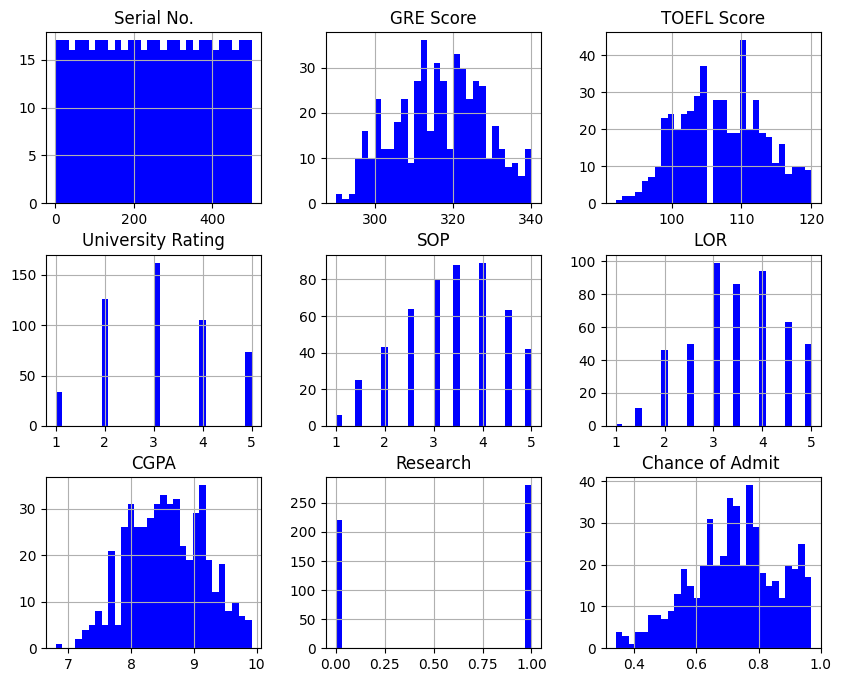

In [ ]:
# Creating Histograme fo bin size = 30
data.hist(figsize=(10,8),bins=30,color='blue')
plt.show()

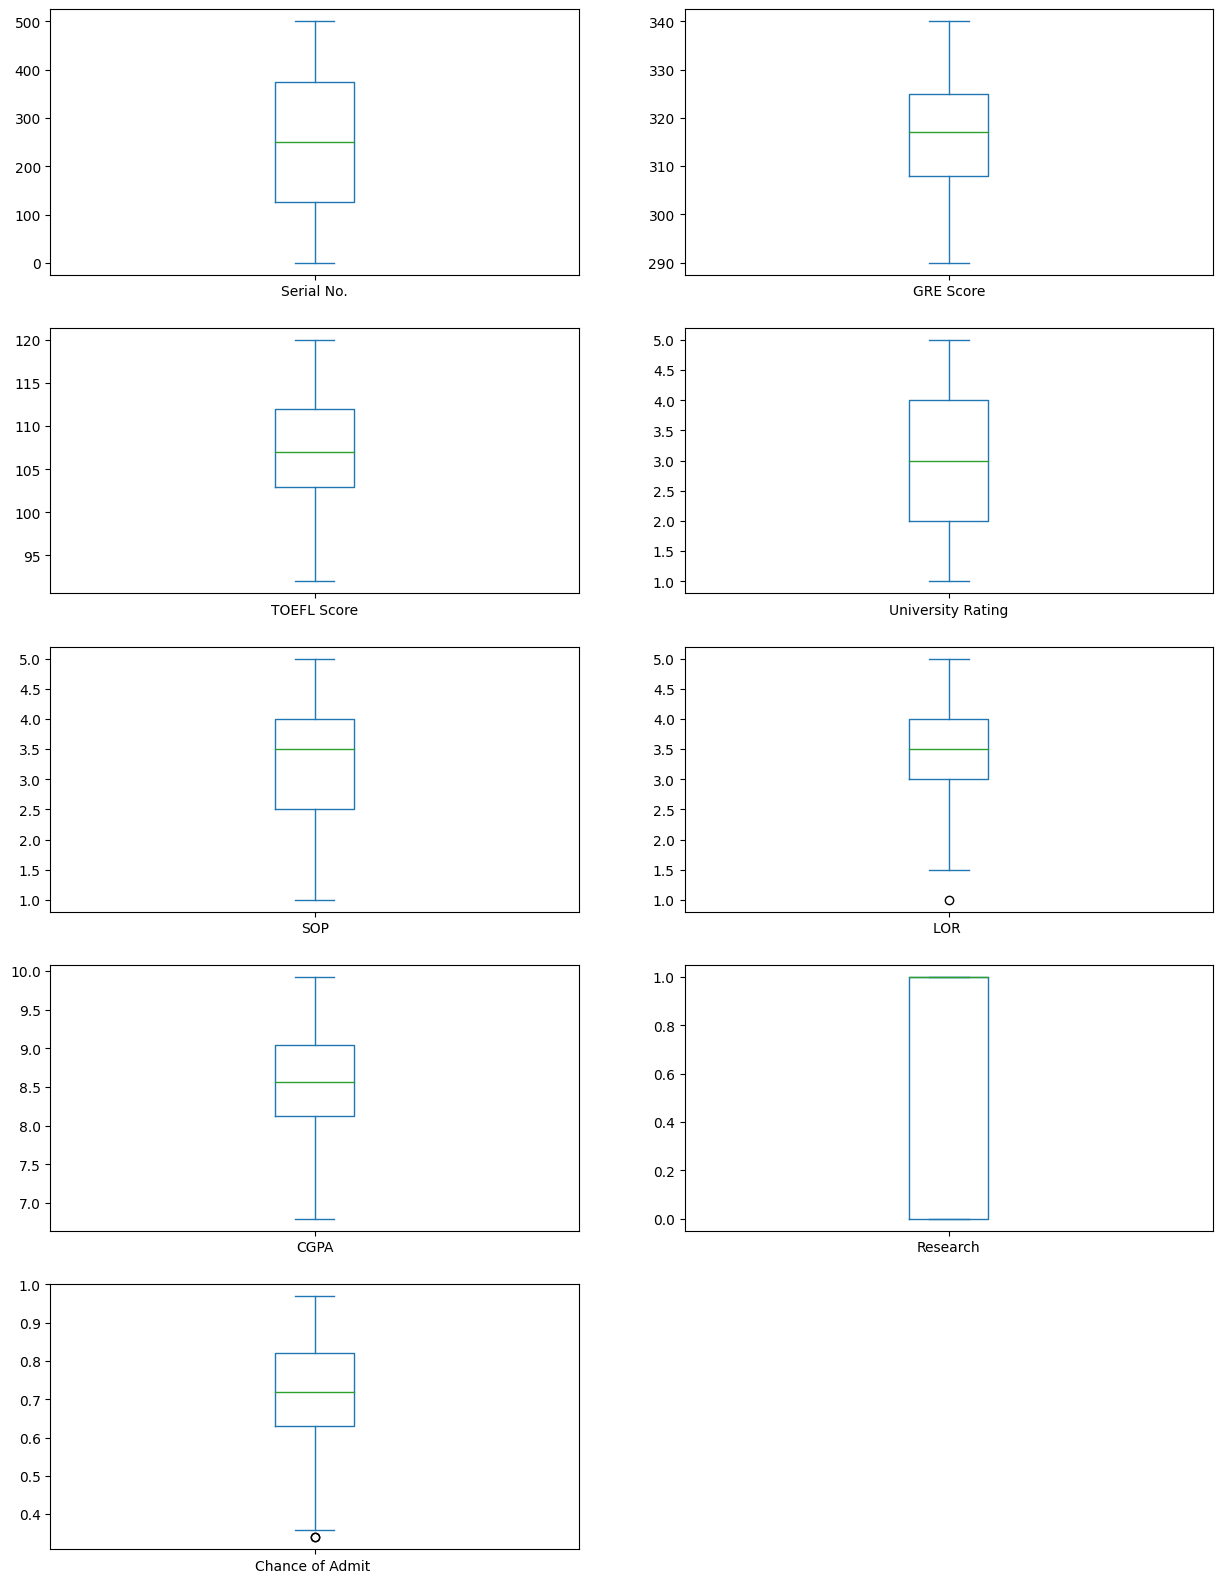

In [ ]:
data.plot(kind='box', subplots=True, layout=(int(np.ceil(data.shape[1] / 2)), 2), figsize=(15, 20))
plt.show()


No Outlier found

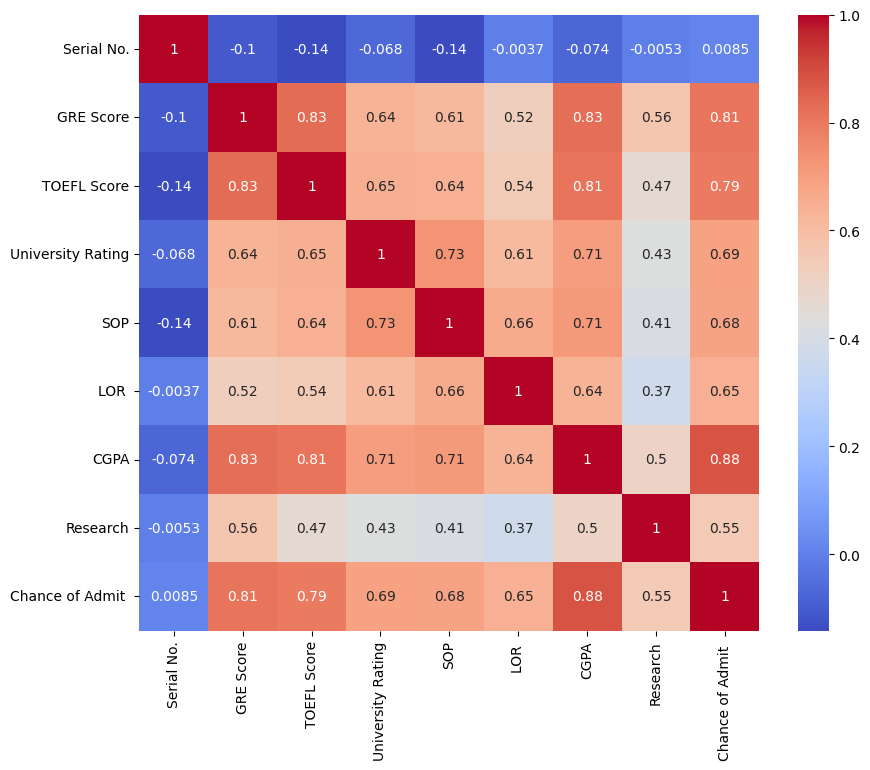

In [ ]:
# HeatMap analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

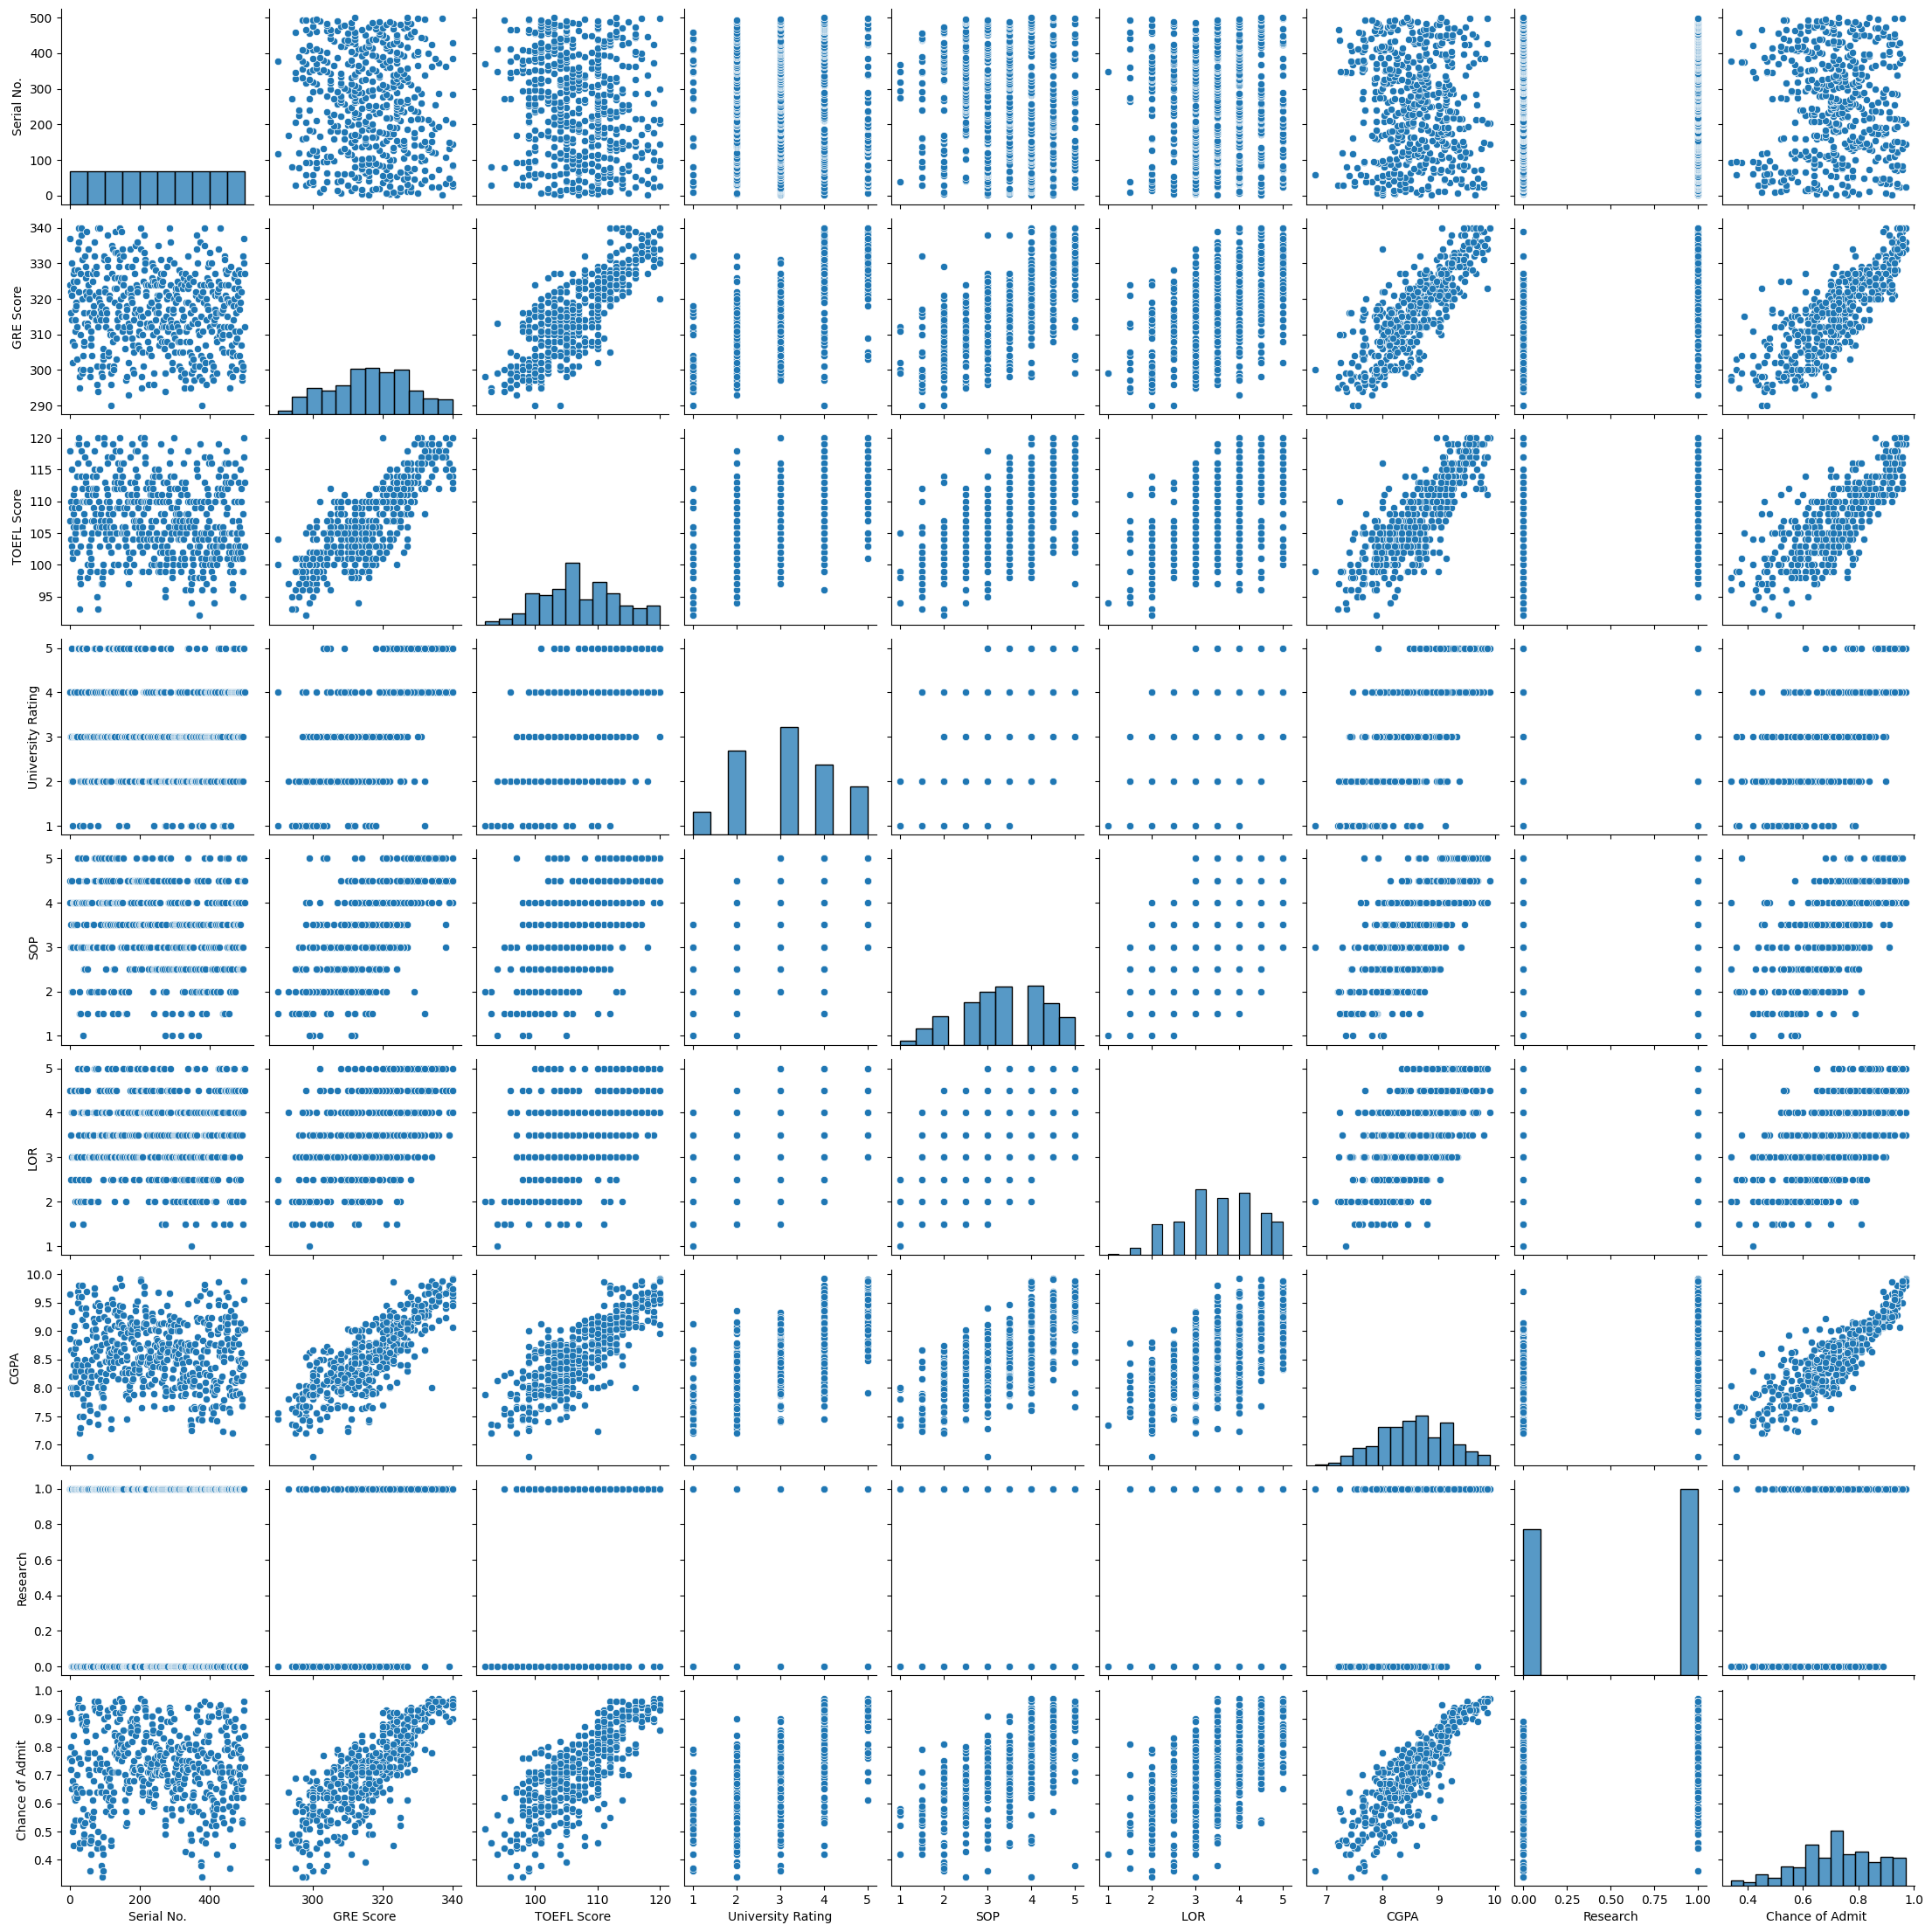

In [ ]:
sns.pairplot(data)
plt.show()

**'Serial No.'** column have no use, dropping this feature to remove Model complexity.

Also Filtering Dependent and Independent Variable

In [ ]:
# 'X' is the features considered for model train and test
X = data.drop(columns=['Chance of Admit ', 'Serial No.'])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


**'Chance of Admit '** Is my Dependent/Label that help to train Model. Value will predict By learing all the features againts Dependent Variable

In [ ]:

y = data['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
data['GRE Score']

0      337
1      324
2      316
3      322
4      314
      ... 
495    332
496    337
497    330
498    312
499    327
Name: GRE Score, Length: 500, dtype: int64

# Splitting Data into Train and Test. Taking 80% for traing and 20% for testing
### Train data will use for Model training and will test Model on test data post Model Training.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [ ]:
X = data.drop(columns=['Chance of Admit ', 'Serial No.'])
y = data['Chance of Admit ']

In [ ]:
# The function returns four arrays:

# X_train: The training set for the features.
# X_test: The testing set for the features.
# y_train: The training set for the target variable.
# y_test: The testing set for the target variable.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardization/Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_test)

In [ ]:
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
249        321          111                  3  3.5   4.0  8.83         1
433        316          111                  4  4.0   5.0  8.54         0
19         303          102                  3  3.5   3.0  8.50         0
322        314          107                  2  2.5   4.0  8.27         0
332        308          106                  3  3.5   2.5  8.21         1
..         ...          ...                ...  ...   ...   ...       ...
106        329          111                  4  4.5   4.5  9.18         1
270        306          105                  2  2.5   3.0  8.22         1
348        302           99                  1  2.0   2.0  7.25         0
435        309          105                  2  2.5   4.0  7.68         0
102        314          106                  2  4.0   3.5  8.25         0

[400 rows x 7 columns]
X_test:
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Rese

#Linear regression Model Building

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
actual = y_test
predicted = y_pred

# Train and test score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

w0 = model.intercept_
w = model.coef_

Coef_df = pd.DataFrame({'Columns': X.columns, 'Coef_': w})
print('Coefficient and Intercept for Linear Regression')
print(f'Intercept_: {w0}')
print(Coef_df)

Train Score: 0.8210671369321553
Test Score: 0.8188432567829631
Coefficient and Intercept for Linear Regression
Intercept_: -1.4214470719016465
             Columns     Coef_
0          GRE Score  0.002434
1        TOEFL Score  0.002996
2  University Rating  0.002569
3                SOP  0.001814
4               LOR   0.017238
5               CGPA  0.112527
6           Research  0.024027


#Ridge Regression Model

In [ ]:

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

prediction_ridge = ridgeReg.predict(X_test)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

w0 = ridgeReg.intercept_
w = ridgeReg.coef_

Coef_df = pd.DataFrame({'Columns': X.columns, 'Coef_': w})
print('Coefficient and Intercept for Ridge Regression')
print(f'Intercept_: {w0}')
print(Coef_df)


Ridge Model............................................

The train score for ridge model is 0.8181397037849536
The test score for ridge model is 0.8096059577714889
Coefficient and Intercept for Ridge Regression
Intercept_: -1.4929813017746456
             Columns     Coef_
0          GRE Score  0.003125
1        TOEFL Score  0.003600
2  University Rating  0.004146
3                SOP  0.004509
4               LOR   0.018894
5               CGPA  0.085722
6           Research  0.020954


#Testing the assumptions of the linear regression model

Multicollinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


VIF_df = pd.DataFrame()

VIF_df['features'] = X.columns

# calculating VIF for each feature
VIF_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [ ]:
# There is only one feature (Research) with VIF score less than 5.
# Does it mean we drop all others?
# NO, we need to drop the features with one by one in decreasing order of VIF and train the model again to see the score.

#Mean of residuals

In [ ]:

residual = pd.DataFrame()
residual['Actual'] = actual
residual['Predicted'] = predicted
residual['diff'] = residual['Actual'] - residual['Predicted']
mean_of_residual = round(residual['diff'].mean(),2)
print(f'Mean of residual: {mean_of_residual}')

Mean of residual: -0.01


#Test for Homoscedasticity

In [ ]:
residual['diff']

361    0.015425
73     0.044819
374   -0.182660
155    0.062630
104   -0.075883
         ...   
347   -0.015631
86     0.033357
75    -0.065988
438   -0.064694
15    -0.108657
Name: diff, Length: 100, dtype: float64

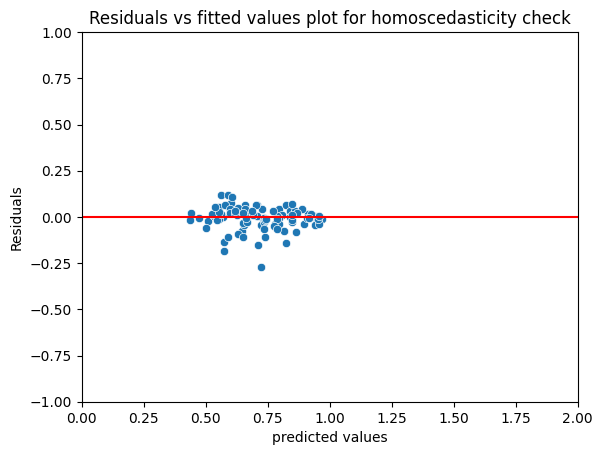

In [ ]:
p = sns.scatterplot(x=predicted,y=residual['diff'])
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,2)

p = sns.lineplot(x=[0,2],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
# Most of the data points do pass through the Linear line, but its too early to conclude the nautre of homoscadasicity.


#Normality of residuals

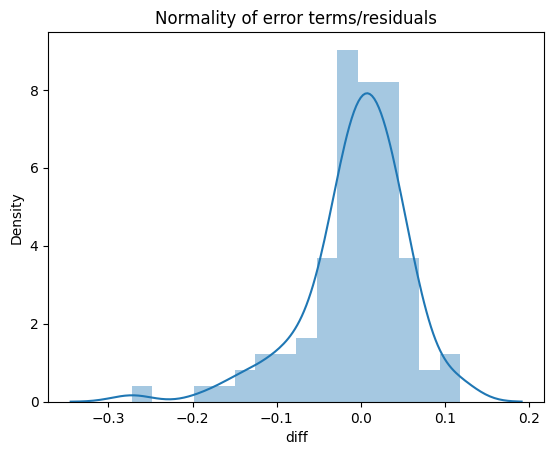

In [ ]:

p = sns.distplot(residual['diff'],kde=True)
p = plt.title('Normality of error terms/residuals')

In [ ]:
# The residuals terms looks pretty much normally distributed for the number of test points we took.
# Based on CLT we can say with increase number of sample size the cure will look more bell shaped.

# Model Performance Evaluation

In [ ]:
print("MAE for Linear Regression",mean_absolute_error(actual,predicted))
print("MAE for Ridge Regression",mean_absolute_error(actual,prediction_ridge))

MAE for Linear Regression 0.042722654277053636
MAE for Ridge Regression 0.0440708561507515


In [ ]:
print("MAE for Linear Regression",mean_squared_error(actual,predicted))
print("MAE for Ridge Regression",mean_squared_error(actual,prediction_ridge))

MAE for Linear Regression 0.003704655398788405
MAE for Ridge Regression 0.003893558163573053


In [ ]:
print("MAE for Linear Regression",r2_score(actual,predicted))
print("MAE for Ridge Regression",r2_score(actual,prediction_ridge))

MAE for Linear Regression 0.8188432567829631
MAE for Ridge Regression 0.8096059577714889


In [ ]:
n= X_test.shape[0]
k= X_test.shape[1]

print("Adjusted R2 Score for Linear Regression",(1 - ((1-r2_score(actual,predicted))*(n-1)/(n-k-1))))
print("Adjusted R2 Score for Ridge Regression",(1 - ((1-r2_score(actual,prediction_ridge))*(n-1)/(n-k-1))))

Adjusted R2 Score for Linear Regression 0.8050595915381886
Adjusted R2 Score for Ridge Regression 0.79511945455845


**THANK YOU**